# clustering - Gaussian Mixture Model

## 간단한 적용 예시

In [68]:
from sklearn.datasets import load_iris, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [83]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,
                 cluster_std = 1.5, random_state = 42)

In [84]:
transform = [[0.6, -0.64], [-0.42, 0.85]]
X_moved = np.dot(X, transform)

clustering_df = pd.DataFrame(data = X_moved, 
                             columns = ['f_1', 'f_2'])
clustering_df['target'] = y

In [85]:
clustering_df

,f_1,f_2,target
0,-6.901529,9.881672,3
1,-3.631122,1.074653,2
2,4.435247,-4.425119,1
3,-4.722402,7.778472,0
4,0.100050,-3.118593,2
...,...,...,...
495,-7.701976,11.717051,3
496,-5.575836,9.777016,0
497,-2.591820,1.005224,2
498,-2.369457,0.394169,2


<AxesSubplot:xlabel='f_1', ylabel='f_2'>

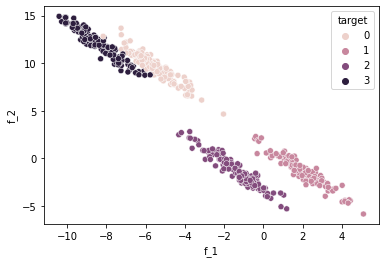

In [86]:
sns.scatterplot(x = clustering_df['f_1'], y = clustering_df['f_2'],
           hue = clustering_df['target'])

다음과 같이 직선 형태로 4개의 그룹을 만들어주었다.
이제 이를 바탕으로, 군집화를 진행하고자 한다.

## K-means의 적용

Gaussian을 쓰기 전에, K-means를 써보자.

<AxesSubplot:xlabel='f_1', ylabel='f_2'>

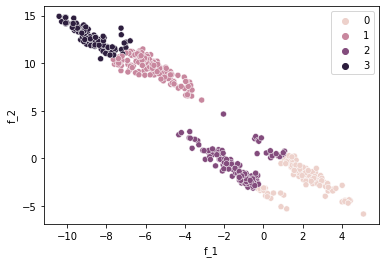

In [88]:
kmeans = KMeans(4, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_moved)
sns.scatterplot(x = clustering_df['f_1'], y = clustering_df['f_2'],
           hue = kmeans_labels)

원형 형태로 하다보니까, 다음과 같이, 갈라줘야 하는 부분에서도 갈라지지 않고 원형 형태로 군집화가 되어버린다...

<AxesSubplot:xlabel='f_1', ylabel='f_2'>

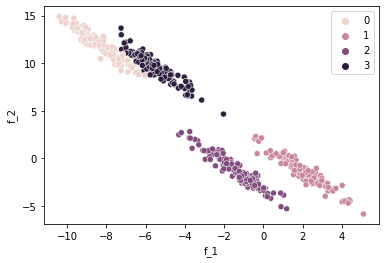

In [89]:
gmm = GaussianMixture(4, random_state = 42)
gmm_labels = gmm.fit_predict(X_moved)
sns.scatterplot(x = clustering_df['f_1'], y = clustering_df['f_2'],
           hue = gmm_labels)

하지만, 가우시안 분포를 사용하니까 직선 형태에서 분포가 조금 더 깔끔하게 나오고 있으을 알 수 있다.